In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import OneHotEncoder

In [3]:
df = sns.load_dataset('titanic')
print(df.shape)
df.head()

(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [13]:
ohe = OneHotEncoder()
X = ohe.fit_transform(df[['sex', 'class']]).toarray()

In [20]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

In [21]:
df['embarked_imputed'] = imputer.fit_transform(df[['embarked']])

In [22]:
ohe = OneHotEncoder()
X = ohe.fit_transform(df[['sex', 'class', 'embarked_imputed']]).toarray()

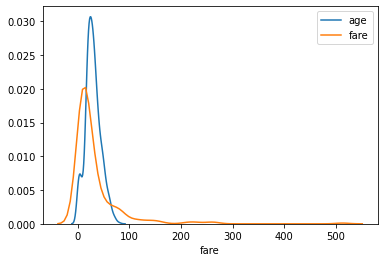

In [29]:
sns.distplot(df['age'], hist=False, label='age')
sns.distplot(df['fare'], hist=False, label='fare')
plt.legend()
plt.show()

In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [32]:
age_scaled = StandardScaler().fit_transform(df[['age']])
fare_scaled = StandardScaler().fit_transform(df[['fare']])

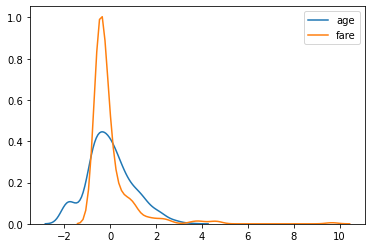

In [33]:
sns.distplot(age_scaled, hist=False, label='age')
sns.distplot(fare_scaled, hist=False, label='fare')
plt.legend()
plt.show()

In [34]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [35]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [38]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.9473684210526315

In [39]:
from sklearn.pipeline import Pipeline

In [40]:
model = Pipeline(steps=[
    ('scaling', StandardScaler()),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

In [41]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9473684210526315

In [42]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [55]:
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor

numeric_transformer = Pipeline(steps=[
    ('imputation', SimpleImputer(strategy='median')),
    ('scaling', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputation', SimpleImputer(strategy='most_frequent')),
    ('one_hot_encoding', OneHotEncoder())
])

column_transformer = ColumnTransformer(transformers=[
    ('numeric', numeric_transformer, ['total_bill', 'size']),
    ('categorical', categorical_transformer, ['sex', 'smoker', 'day', 'time'])
])

model = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', KNeighborsRegressor(n_neighbors=7))
])

In [56]:
X = df[['total_bill', 'sex', 'smoker', 'day', 'time', 'size']]
y = df['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [57]:
from sklearn.metrics import mean_squared_error

In [58]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

1.1666425225828037

In [64]:
df = sns.load_dataset('titanic')
df.head(20)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [60]:
X = df[['class', 'sex', 'fare', 'embarked', 'age']]
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [62]:
numeric_transformer = Pipeline(steps=[
    ('imputation', SimpleImputer(strategy='median')),
    ('scaling', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputation', SimpleImputer(strategy='most_frequent')),
    ('one_hot_encoding', OneHotEncoder())
])

column_transformer = ColumnTransformer(transformers=[
    ('numeric', numeric_transformer, ['fare', 'age']),
    ('categorical', categorical_transformer, ['class', 'sex', 'embarked'])
])

model = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('classification', KNeighborsClassifier(n_neighbors=5))
])

In [63]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8565022421524664

In [65]:
df = sns.load_dataset('tips')
df.head()
X = df[['total_bill', 'sex', 'smoker', 'day', 'time', 'size']]
y = df['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [127]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

numeric_transformer = Pipeline(steps=[
    ('imputation', SimpleImputer(strategy='median')),
    ('scaling', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputation', SimpleImputer(strategy='most_frequent')),
    ('one_hot_encoding', OneHotEncoder())
])

column_transformer = ColumnTransformer(transformers=[
    ('numeric', numeric_transformer, ['total_bill', 'size']),
    ('categorical', categorical_transformer, ['sex', 'smoker', 'day', 'time'])
])

model = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', DecisionTreeRegressor(max_depth=3))
])

In [128]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

0.744839112762537

In [129]:
y_pred = model.predict(X_train)
mean_squared_error(y_train, y_pred)

0.8777895369325805

In [130]:
from sklearn.tree import export_text

In [131]:
print(export_text(model.named_steps['regression']))

|--- feature_0 <= 0.04
|   |--- feature_0 <= -0.77
|   |   |--- feature_8 <= 0.50
|   |   |   |--- value: [1.73]
|   |   |--- feature_8 >  0.50
|   |   |   |--- value: [2.47]
|   |--- feature_0 >  -0.77
|   |   |--- feature_0 <= -0.42
|   |   |   |--- value: [2.42]
|   |   |--- feature_0 >  -0.42
|   |   |   |--- value: [2.86]
|--- feature_0 >  0.04
|   |--- feature_0 <= 3.06
|   |   |--- feature_1 <= 0.85
|   |   |   |--- value: [3.62]
|   |   |--- feature_1 >  0.85
|   |   |   |--- value: [4.29]
|   |--- feature_0 >  3.06
|   |   |--- feature_0 <= 3.20
|   |   |   |--- value: [9.00]
|   |   |--- feature_0 >  3.20
|   |   |   |--- value: [10.00]



In [151]:
from sklearn.tree import DecisionTreeClassifier

numeric_transformer = Pipeline(steps=[
    ('imputation', SimpleImputer(strategy='median')),
    ('scaling', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputation', SimpleImputer(strategy='most_frequent')),
    ('one_hot_encoding', OneHotEncoder())
])

column_transformer = ColumnTransformer(transformers=[
    ('numeric', numeric_transformer, ['fare', 'age']),
    ('categorical', categorical_transformer, ['class', 'sex', 'embarked'])
])

model = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('classification', DecisionTreeClassifier(max_depth=8))
])

In [133]:
df = sns.load_dataset('titanic')
X = df[['fare', 'age', 'class', 'sex', 'embarked']]
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [152]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7713004484304933

In [153]:
y_pred = model.predict(X_train)
accuracy_score(y_train, y_pred)

0.905688622754491

In [154]:
model.predict_proba(X_test)

array([[0.        , 1.        ],
       [0.91847826, 0.08152174],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.91847826, 0.08152174],
       [0.        , 1.        ],
       [0.82608696, 0.17391304],
       [0.91847826, 0.08152174],
       [0.        , 1.        ],
       [0.91847826, 0.08152174],
       [0.125     , 0.875     ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.625     , 0.375     ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.64150943, 0.35849057],
       [0.91847826, 0.08152174],
       [0.91847826, 0.08152174],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.6       , 0.4       ],
       [0.        , 1.        ],
       [0.91847826, 0.08152174],
       [0.82608696, 0.17391304],
       [0.91847826, 0.08152174],
       [0.91847826, 0.08152174],
       [0.

In [155]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [156]:
X = df[['total_bill', 'sex', 'smoker', 'day', 'time', 'size']]
y = df['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [172]:
from sklearn.linear_model import LinearRegression, Ridge

numeric_transformer = Pipeline(steps=[
    ('imputation', SimpleImputer(strategy='median')),
    ('scaling', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputation', SimpleImputer(strategy='most_frequent')),
    ('one_hot_encoding', OneHotEncoder())
])

column_transformer = ColumnTransformer(transformers=[
    ('numeric', numeric_transformer, ['total_bill', 'size']),
    ('categorical', categorical_transformer, ['sex', 'smoker', 'day', 'time'])
])

model = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', Ridge(alpha=10.))
])

In [173]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

1.0145563823490185

In [161]:
model.named_steps['regression'].coef_

array([ 0.88045028,  0.10826984, -0.03129611,  0.03129611, -0.00795768,
        0.00795768, -0.06514647,  0.10721436,  0.19095183, -0.23301972,
       -0.19004348,  0.19004348])

In [163]:
y_pred = model.predict(X_train)
mean_squared_error(y_train, y_pred)

1.016433174112325